# Getting Started with Quantum Computing

In this notebook, we will get things going by just running a simple quantum circuit. You will need to have installed the qiskit package.

In [ ]:
from qiskit import QuantumCircuit


# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw('text')

q:

## Doing something with the Qubit

Now let's put the Qubit into a superposition. We can do that using a Hadamard gate.


Measurement results: {'0': 528, '1': 496}


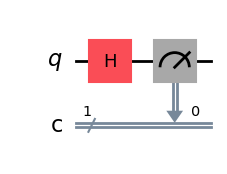

In [5]:
# Import the Aer simulator backend from Qiskit's Aer module
from qiskit_aer import Aer

# Import QuantumCircuit to create circuits, and transpile to prepare them for execution
from qiskit import QuantumCircuit, transpile

# Step 1: Create a quantum circuit with 1 qubit and 1 classical bit for measurement
circuit = QuantumCircuit(1, 1)

# Step 2: Apply a Hadamard gate to the qubit. Note that this does not happen until you call run()
# The circuit is really just a blueprint until you execute it
# This puts the qubit into a superposition: equal probability of being measured as 0 or 1
circuit.h(0)

# Step 3: Measure the quantum state into the classical bit
# This collapses the superposition to a definite 0 or 1
# The first argument is the qubit index that you want to measure
# The second argument is the classical bit index where the result will be stored
circuit.measure(0, 0)

# Step 4: Choose the simulator backend that mimics a real quantum computer
backend = Aer.get_backend('qasm_simulator')

# Step 5: Transpile (compile/convert) the circuit for the chosen backend
# This step adapts the circuit to the constraints and format of the backend
new_circuit = transpile(circuit, backend)

# Step 6: Run the transpiled circuit on the simulator
# The circuit is executed multiple times (shots) to get a distribution of outcomes
job = backend.run(new_circuit)

# Step 7: Retrieve the results of the job
result = job.result()

# Step 8: Get the counts of measurement outcomes
# For example: {'0': 503, '1': 497} after 1000 runs
counts = result.get_counts(circuit)
print("Measurement results:", counts)

# Step 9: Draw the circuit visually (using matplotlib)
# Shows the H gate and measurement in a standard diagram
circuit.draw('mpl')